In [1]:
import pandas as pd
import numpy as np
import json
from sklearn.cross_validation import train_test_split
import seaborn as sns
import statsmodels.api as smf
from sklearn.cross_validation import train_test_split
from statsmodels.tools.eval_measures import rmse
import pylab
import scipy.stats as stats
from scipy.stats import normaltest
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

/home/vijay/anaconda2/envs/py35/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/vijay/anaconda2/envs/py35/lib/python3.5/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
# read the data file
def read_json(file_name):
    with open(file_name, 'r') as f:
        distros_dict = json.load(f)
        price_Dct = distros_dict['price_D']
        social_Dct = distros_dict['social_D']
    return price_Dct, social_Dct

In [3]:
price_Dct, social_Dct = read_json('data.json')

In [4]:
price_df =  pd.DataFrame(price_Dct)
social_df =  pd.DataFrame(social_Dct)

In [5]:
# picking up fields of interest
price_df = price_df[['date','last']]
social_df = social_df[['90day_bull_prop','30day_bull_prop','bull_prop']]

In [6]:
price_df['date'] = pd.to_datetime(price_df.date)

In [7]:
price_df.date.describe()

count                      50
unique                     50
top       2017-04-20 00:00:00
freq                        1
first     2017-02-21 00:00:00
last      2017-05-19 00:00:00
Name: date, dtype: object

In [8]:
price_df.describe()

,last
count,50.000000
mean,143.661000
std,5.864155
min,136.530000
25%,139.385000
50%,141.125000
75%,146.945000
max,156.100000


In [9]:
social_df.describe()

,90day_bull_prop,30day_bull_prop,bull_prop
count,50.000000,50.000000,46.000000
mean,0.602032,0.627978,0.638716
std,0.016782,0.019507,0.109260
min,0.573227,0.594510,0.363636
25%,0.588540,0.617374,0.561957
50%,0.599560,0.624675,0.617378
75%,0.614735,0.634911,0.727971
max,0.633052,0.675016,0.842105


In [10]:
price_df[0:5]

,date,last
0,2017-02-21,136.70
1,2017-02-22,137.07
2,2017-02-23,136.53
3,2017-02-24,136.66
4,2017-02-27,136.93


In [11]:
social_df[0:5]

,90day_bull_prop,30day_bull_prop,bull_prop
0,0.573629,0.625031,0.763889
1,0.573227,0.625062,0.546875
2,0.576786,0.632999,0.750000
3,0.576739,0.628308,0.604839
4,0.578236,0.612395,0.577465


In [12]:
#combine the to be features ie price and sentiment

In [13]:
combined_features = pd.concat([price_df, social_df], axis=1)

In [14]:
combined_features = combined_features.sort_values('date',ascending = False)
combined_features

,date,last,90day_bull_prop,30day_bull_prop,bull_prop
49,2017-05-19,152.96,0.621622,0.664915,NaN
48,2017-05-18,152.54,0.623794,0.663642,NaN
47,2017-05-17,150.25,0.623689,0.663908,NaN
46,2017-05-16,155.47,0.624892,0.664137,NaN
45,2017-05-15,155.70,0.633052,0.664794,0.609756
44,2017-05-12,156.10,0.633017,0.675016,0.716763
43,2017-05-11,153.95,0.627646,0.658635,0.731707
42,2017-05-10,153.26,0.626304,0.649630,0.640449
41,2017-05-09,153.96,0.627249,0.651989,0.744898
40,2017-05-08,153.00,0.624795,0.646442,0.737705


In [15]:
combined_features['bull_prop'].fillna((combined_features['bull_prop'].mean()), inplace=True)

In [16]:
combined_features.rename(columns={'last': 'today_closing'}, inplace=True)
combined_features

,date,today_closing,90day_bull_prop,30day_bull_prop,bull_prop
49,2017-05-19,152.96,0.621622,0.664915,0.638716
48,2017-05-18,152.54,0.623794,0.663642,0.638716
47,2017-05-17,150.25,0.623689,0.663908,0.638716
46,2017-05-16,155.47,0.624892,0.664137,0.638716
45,2017-05-15,155.70,0.633052,0.664794,0.609756
44,2017-05-12,156.10,0.633017,0.675016,0.716763
43,2017-05-11,153.95,0.627646,0.658635,0.731707
42,2017-05-10,153.26,0.626304,0.649630,0.640449
41,2017-05-09,153.96,0.627249,0.651989,0.744898
40,2017-05-08,153.00,0.624795,0.646442,0.737705


In [17]:
# Shift the time line by one day
previous_closing = combined_features['today_closing'][1:]
npa = np.array(previous_closing)
previous_closing =  np.append(npa,np.nan)
previous_closing = pd.DataFrame(previous_closing)
combined_features = combined_features.reset_index(drop=True)
combined_features['previous_closing'] = previous_closing[0]

previous_bull_prop = combined_features['bull_prop'][1:]
npa = np.array(previous_bull_prop)
previous_bull_prop =  np.append(npa,np.nan)
previous_bull_prop = pd.DataFrame(previous_bull_prop)
combined_features['previous_bull_prop'] = previous_bull_prop[0]

In [18]:
combined_features

,date,today_closing,90day_bull_prop,30day_bull_prop,bull_prop,previous_closing,previous_bull_prop
0,2017-05-19,152.96,0.621622,0.664915,0.638716,152.54,0.638716
1,2017-05-18,152.54,0.623794,0.663642,0.638716,150.25,0.638716
2,2017-05-17,150.25,0.623689,0.663908,0.638716,155.47,0.638716
3,2017-05-16,155.47,0.624892,0.664137,0.638716,155.70,0.609756
4,2017-05-15,155.70,0.633052,0.664794,0.609756,156.10,0.716763
5,2017-05-12,156.10,0.633017,0.675016,0.716763,153.95,0.731707
6,2017-05-11,153.95,0.627646,0.658635,0.731707,153.26,0.640449
7,2017-05-10,153.26,0.626304,0.649630,0.640449,153.96,0.744898
8,2017-05-09,153.96,0.627249,0.651989,0.744898,153.00,0.737705
9,2017-05-08,153.00,0.624795,0.646442,0.737705,148.95,0.588235


In [19]:
combined_features['previous_closing'].fillna((combined_features['previous_closing'].mean()), inplace=True)
combined_features['previous_bull_prop'].fillna((combined_features['previous_bull_prop'].mean()), inplace=True)
combined_features

,date,today_closing,90day_bull_prop,30day_bull_prop,bull_prop,previous_closing,previous_bull_prop
0,2017-05-19,152.96,0.621622,0.664915,0.638716,152.540000,0.638716
1,2017-05-18,152.54,0.623794,0.663642,0.638716,150.250000,0.638716
2,2017-05-17,150.25,0.623689,0.663908,0.638716,155.470000,0.638716
3,2017-05-16,155.47,0.624892,0.664137,0.638716,155.700000,0.609756
4,2017-05-15,155.70,0.633052,0.664794,0.609756,156.100000,0.716763
5,2017-05-12,156.10,0.633017,0.675016,0.716763,153.950000,0.731707
6,2017-05-11,153.95,0.627646,0.658635,0.731707,153.260000,0.640449
7,2017-05-10,153.26,0.626304,0.649630,0.640449,153.960000,0.744898
8,2017-05-09,153.96,0.627249,0.651989,0.744898,153.000000,0.737705
9,2017-05-08,153.00,0.624795,0.646442,0.737705,148.950000,0.588235


In [20]:
combined_features_df = combined_features[['previous_closing','previous_bull_prop','30day_bull_prop','90day_bull_prop']]

In [21]:
combined_features_df[0:5]

,previous_closing,previous_bull_prop,30day_bull_prop,90day_bull_prop
0,152.54,0.638716,0.664915,0.621622
1,150.25,0.638716,0.663642,0.623794
2,155.47,0.638716,0.663908,0.623689
3,155.70,0.609756,0.664137,0.624892
4,156.10,0.716763,0.664794,0.633052


In [22]:
labels = combined_features['today_closing']

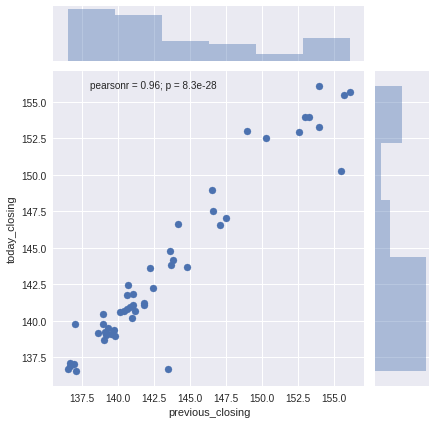

In [23]:
sns.jointplot(combined_features_df.previous_closing,labels)

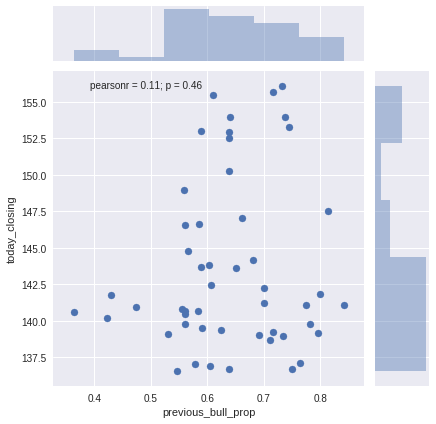

In [24]:
sns.jointplot(combined_features_df.previous_bull_prop,labels)

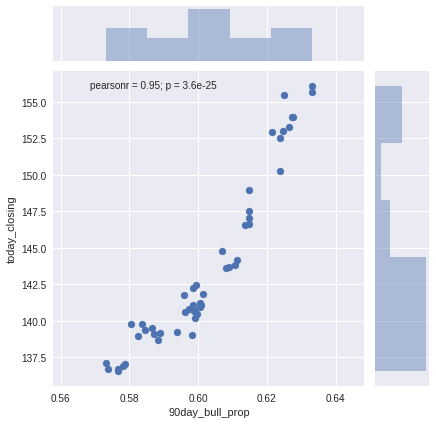

In [25]:
sns.jointplot(combined_features_df['90day_bull_prop'],labels)

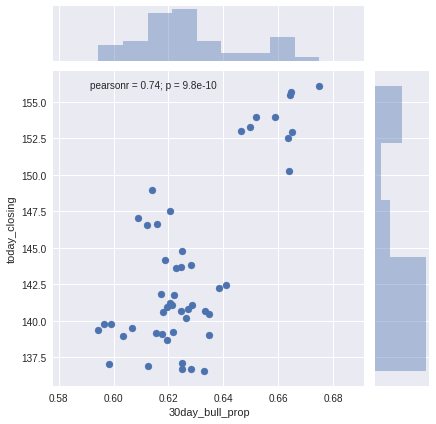

In [26]:
sns.jointplot(combined_features_df['30day_bull_prop'],labels)

In [27]:
def plot_corr(df, size=7):
    """
    Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot

    Displays:
        matrix of correlation between columns.  Blue-cyan-yellow-red-darkred => less to more correlated
                                                0 ------------------>  1
                                                Expect a darkred line running from top left to bottom right
    """

    corr = df.corr()    # data frame correlation function
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)   # color code the rectangles by correlation value
    plt.xticks(range(len(corr.columns)), corr.columns)  # draw x tick marks
    plt.yticks(range(len(corr.columns)), corr.columns)  # draw y tick marks

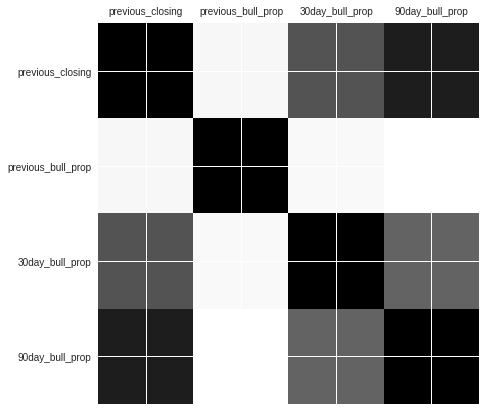

In [28]:
plot_corr(combined_features_df)

In [29]:
combined_features_df.corr()

,previous_closing,previous_bull_prop,30day_bull_prop,90day_bull_prop
previous_closing,1.000000,0.129761,0.761295,0.906457
previous_bull_prop,0.129761,1.000000,0.111683,0.067653
30day_bull_prop,0.761295,0.111683,1.000000,0.701875
90day_bull_prop,0.906457,0.067653,0.701875,1.000000


In [32]:
# I will select 90day_bull_prop,previous_closing 
# Not using previous_bull_prop as it has proved to have less or no impact

* To avoid collinearity 
  just retain previous_closing & 90day_bull_prop, I only have 50 days of historic and previous clsing covers it   well.

In [33]:
combined_features_df = combined_features_df[['previous_closing','90day_bull_prop']]
feature_col_names = ['previous_closing', '90day_bull_prop']
predicted_class_name = labels
X = combined_features_df[feature_col_names].values
y = predicted_class_name.values
split_test_size = 0.40
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split_test_size, random_state=42)

In [34]:
print(len( X_train ))
print(len( X_test ))

30
20


In [55]:
lm_model = smf.OLS( y_train, X_train ).fit()
lm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 9.768e+04
Date:                Thu, 12 Apr 2018   Prob (F-statistic):           1.54e-54
Time:                        12:45:29   Log-Likelihood:                -58.850
No. Observations:                  30   AIC:                             121.7
Df Residuals:                      28   BIC:                             124.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.5718      0.120      4.782      0.000       0.327       0.817
x2           102.3810     28.480      3.595      0.001      44.043     160.719
==============================================================================
Omnibus:                        1.030   Durbin-Watson:                   2.358
Prob(Omnibus):                  0.597   Jarque-Bera (JB):                0.496
Skew:                           0.313   Prob(JB):                        0.781
Kurtosis:                       3.075   Cond. No.                     1.26e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.26e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [56]:
lm_model.pvalues

array([  5.03397676e-05,   1.23074708e-03])

In [36]:
y_predict = lm_model.predict( X_test )
rmse( y_predict, y_test )

1.2018420921619815

In [37]:
y_predict_train = lm_model.predict( X_train )
rmse( y_predict_train, y_train )

1.7206824599225616

In [39]:
metrics.explained_variance_score(y_test, y_predict)

0.96384225472798302

In [38]:
# there is no much over fitting

In [ ]:
# Reject the H0 with

* Residual analysis

In [41]:
residuals = y_test - y_predict

In [42]:
# Find out if the residuals are normally distributed and independednt of eachother
residuals_set1 = residuals[0:-1]
residuals_set2 = residuals[1:]

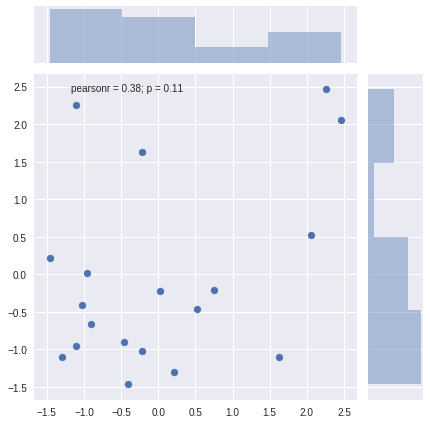

In [43]:
sns.jointplot(residuals_set1, residuals_set2)

In [45]:
# RESIDUALS ARE RANDOM OF EACH OTHER

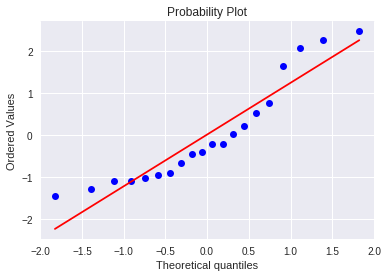

In [46]:
import pylab
import scipy.stats as stats
from scipy.stats import normaltest
stats.probplot( residuals, dist="norm", plot=pylab )
pylab.show()

In [47]:
# Residuals are Normally distributed
# Residuals are independent of each other 
# Residual analysis looks good

In [48]:
# save to csv or just display predected vs actual closing
predicted_actual_closing = pd.DataFrame(y_predict, columns=['predicted'])
predicted_actual_closing['actual'] = y_test 

In [50]:
predicted_actual_closing[0:10]

,predicted,actual
0,146.759768,147.51
1,139.734228,139.52
2,141.996417,140.97
3,137.343415,136.93
4,145.113715,143.65
5,136.853429,137.07
6,142.352091,141.05
7,142.155220,141.05
8,141.613841,140.66
9,143.600966,143.62


In [52]:
lm_model.predict([150,0.612]) # Example YESTERDAY CLOSING AND YESTERDAY SENTIMENT

array([ 148.42808614])

In [53]:
lm_model.predict([150,0.412]) # Example YESTERDAY CLOSING AND YESTERDAY SENTIMENT

array([ 127.95188047])

In [ ]:
# Both the input features 'previous_closing','90day_bull_prop' have a great impact on the next day closing
# Hence reject H0

Closing price can be predicted as a function of previous closing and 90day_bull_prob

IN the previous case , it was proved that previous_closing has no effect on the next day closing price, whihc is correct too
